<a href="https://colab.research.google.com/github/aj1365/Machine-Learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
learning_rate=0.001
training_steps=10000
display_step=500

In [3]:
# Training Data.
X = np.array([1.3,4.4,6.8,4.2,9.8,6.2,7.6,2.8,
              7.1,10.8,5.3,7.5,5.9,9.27,3.1,1.8])
Y = np.array([1.7,2.6,2.6,1.6,3.4,2.8,2.2,1.5,
              2.0,3.7,1.1,2.3,2.42,2.6,1.3,1.4])

In [4]:
############# trainable parameters
a=tf.Variable(np.random.randn(), name="weight")
b=tf.Variable(np.random.randn(), name="bias")

############ model
def linear_regression(x):
    return a * x + b
########## loss function
def mean_square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

########### optimizer
optimizer=tf.optimizers.SGD(learning_rate)

In [5]:
############## optimization process
def run_optimization(x, y):

    with tf.GradientTape() as g:

        pred=linear_regression(x)
        loss=mean_square_loss(pred, y)

    gradients=g.gradient(loss, [a, b])

    optimizer.apply_gradients(zip(gradients, [a, b]))

In [6]:
############### Training procedure

for step in range(1, training_steps+1):


    run_optimization(X, Y)

    if step % display_step==0:

        pred=linear_regression(X)
        loss=mean_square_loss(pred, Y)

        print("step: %i, loss: %f, a: %f, b: %f"  % (step, loss, a, b))

step: 1000, loss: 0.294909, a: 0.104119, b: 1.723258
step: 1500, loss: 0.264516, a: 0.121273, b: 1.601329
step: 2000, loss: 0.243081, a: 0.135679, b: 1.498936
step: 2500, loss: 0.227965, a: 0.147777, b: 1.412946
step: 3000, loss: 0.217304, a: 0.157937, b: 1.340734
step: 3500, loss: 0.209786, a: 0.166469, b: 1.280092
step: 4000, loss: 0.204483, a: 0.173634, b: 1.229165
step: 4500, loss: 0.200744, a: 0.179651, b: 1.186396
step: 5000, loss: 0.198107, a: 0.184704, b: 1.150480
step: 5500, loss: 0.196247, a: 0.188948, b: 1.120317
step: 6000, loss: 0.194935, a: 0.192511, b: 1.094988
step: 6500, loss: 0.194010, a: 0.195504, b: 1.073716
step: 7000, loss: 0.193358, a: 0.198017, b: 1.055853
step: 7500, loss: 0.192897, a: 0.200128, b: 1.040852
step: 8000, loss: 0.192573, a: 0.201900, b: 1.028254
step: 8500, loss: 0.192344, a: 0.203389, b: 1.017674
step: 9000, loss: 0.192183, a: 0.204639, b: 1.008789
step: 9500, loss: 0.192069, a: 0.205689, b: 1.001328
step: 10000, loss: 0.191989, a: 0.206570, b: 0

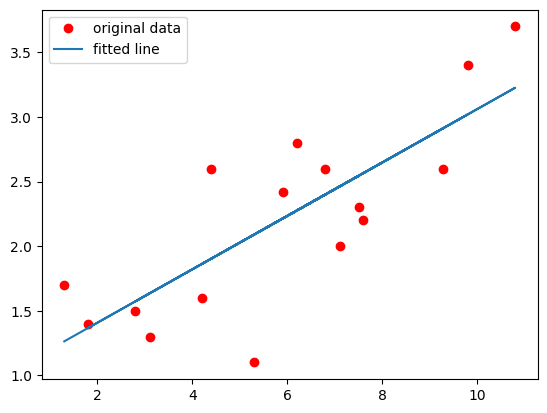

In [7]:
############ plot the results

plt.plot(X, Y, 'ro', label='original data')
plt.plot(X, a * X + b, label='fitted line')
plt.legend()
plt.show()